In [311]:
import pandas as pd    
import numpy as np 
import os, sys
from flask import Flask, render_template, redirect, request, jsonify 
import missingno
import time
import random
import json
import seaborn as sns
import matplotlib.pyplot  as plt
from utils.apis_tb import dfjson

ModuleNotFoundError: No module named 'utils'

In [312]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)
data.head()


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.0,0.0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.0,0.0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-24,12.0,8.0,0.0,0.0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-25,17.0,5.0,0.0,0.0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-26,19.0,2.0,0.0,0.0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


In [313]:
data.shape

(35083, 36)

In [314]:
Data_all_countries = data[(data.location == "Spain") | (data.location == "Iran") | (data.location == "Netherlands") | (data.location == "Mexico") | (data.location == "Brazil")]

In [ ]:
dfjson(Data_all_countries)

#3. Cleaning the dataset

In [317]:
Data_all_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099 entries, 4540 to 24291
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         1099 non-null   object 
 1   continent                        1099 non-null   object 
 2   location                         1099 non-null   object 
 3   date                             1099 non-null   object 
 4   total_cases                      1091 non-null   float64
 5   new_cases                        1091 non-null   float64
 6   total_deaths                     1091 non-null   float64
 7   new_deaths                       1091 non-null   float64
 8   total_cases_per_million          1091 non-null   float64
 9   new_cases_per_million            1091 non-null   float64
 10  total_deaths_per_million         1091 non-null   float64
 11  new_deaths_per_million           1091 non-null   float64
 12  new_tests       

In [318]:
#Changing date to datetime64 type and setting as index, saving the data in a new variable: data_covid which we will further continue to use.

Data_all_countries.date = pd.to_datetime(Data_all_countries.date) 
data_covid = Data_all_countries.set_index("date")
data_covid.head(10)

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-03,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-04,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-05,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-06,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-07,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-08,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


 
Now we will continue having a look at the missing values.


Preview of data with null values:


,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


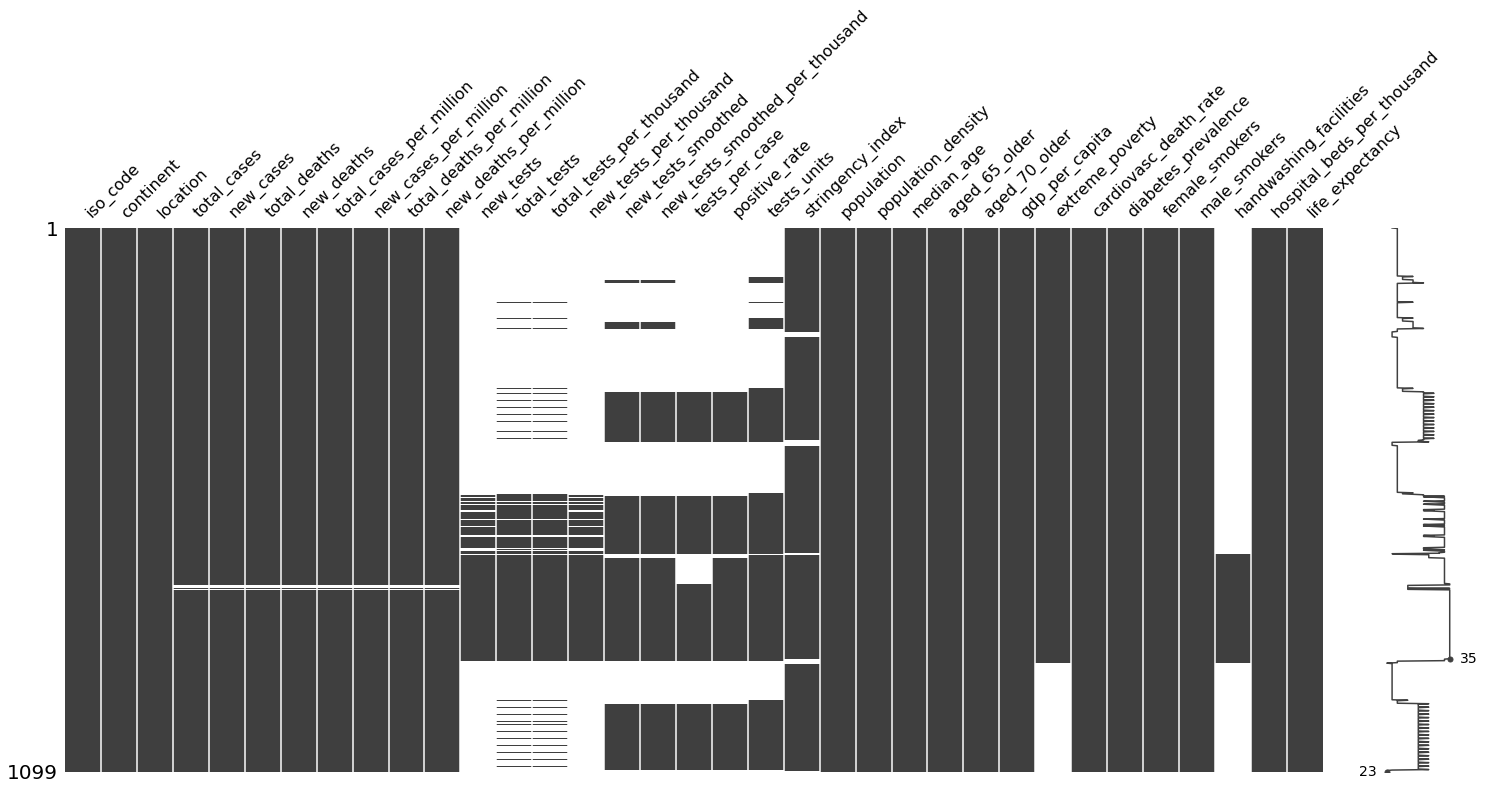

In [319]:
# generate preview of entries with null values. The white spaces demonstrate missing data.
if len(data_covid[data_covid.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:")
    display(data_covid[data_covid.isnull().any(axis=1)].head(3))
    missingno.matrix(data_covid)
    plt.show()

In [320]:
#Removing the columns with too many NaN values:
data_covid.drop(["new_tests", "total_tests", "total_tests_per_thousand", "new_tests_per_thousand", "tests_units", "new_tests_smoothed", "new_tests_smoothed_per_thousand", "stringency_index", "extreme_poverty", "handwashing_facilities"], axis=1, inplace=True)

In [321]:
#Removing rows with only NaN values.
data_covid.dropna(axis=0, how="all", inplace=True)

 Now that we have checked the missing values, we will continue with the duplicated values.

In [322]:
#generate count statistics of duplicate entries

if len(data_covid[data_covid.duplicated()]) > 0:
    print("\n***Number of duplicated entries: ", len(data_covid[data_covid.duplicated()]))
    display(data_covid[data_covid.duplicated(keep=False)].sort_values(by=list(data_covid.columns)).head())
else:
    print("\nNo duplicated entries found")


***Number of duplicated entries:  278


,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,tests_per_case,positive_rate,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-03,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-04,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88


In [323]:
#removing duplicated values. ## TODO maybe change this?? not sure if we want to remove all the duplicates?
data_covid.drop_duplicates(inplace=True)

In [324]:
#Removing rows with only NaN values.
data_covid.dropna(axis=0, how="all", inplace=True)

In [325]:
data_covid.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'tests_per_case', 'positive_rate',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand', 'life_expectancy'],
      dtype='object')

In [326]:
#removing the columns that have irrelevant data for our study. # TODO have a look if we want to remove other columns as well. Depends on what we are actually analising.. hypothesis?

data_covid.drop(['iso_code', 'continent','gdp_per_capita','life_expectancy', 'cardiovasc_death_rate', 'diabetes_prevalence'], axis=1, inplace=True)

4. Studying and visualizing the data

- Brazil 

Brazil declared a public health emergency in early March (on the 17th of March 2020), just a few days after the World Health Organization. The Ministry of Health urged state officials to cancel public events and put social-distancing measures in place.

Despite non-essential businesses reopened on 9th of June 2020 in the city of Rio de Janeiro, the easing of restrictions marks the beginning of six phases of reopening planned by officials. This is the reason why we decided not to display the end of the "alarm state" as it hasn´t concluded yet.

However, the conflicting messages from the government left Brazilians uncertain about isolation measures, which led to low compliance. That in turn led to Brazil’s caseload being one of the highest in the world. Sources:

- https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Brazil 
- https://covid19.who.int/region/amro/country/br

In [328]:
#Setting to display complete contents of our dataframe without any kind of truncation.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

We will need to have a look the whole dataset without any truncation as we want to make sure we are taking into account only the useful information for our case. 

In [329]:
#Filtering the dataset for the data of Brazil and displaying all rows and columns to explore the dataset.
Brazil = data_covid[data_covid.location == "Brazil"]
Brazil

,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,tests_per_case,positive_rate,population,population_density,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers,hospital_beds_per_thousand
date,,,,,,,,,,,,,,,,,,,
2019-12-31,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-02-26,Brazil,1.0,1.0,0.0,0.0,0.005,0.005,0.000,0.000,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-02-27,Brazil,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-01,Brazil,2.0,1.0,0.0,0.0,0.009,0.005,0.000,0.000,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-02,Brazil,2.0,0.0,0.0,0.0,0.009,0.000,0.000,0.000,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-05,Brazil,3.0,1.0,0.0,0.0,0.014,0.005,0.000,0.000,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-06,Brazil,8.0,5.0,0.0,0.0,0.038,0.024,0.000,0.000,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-07,Brazil,13.0,5.0,0.0,0.0,0.061,0.024,0.000,0.000,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-08,Brazil,13.0,0.0,0.0,0.0,0.061,0.000,0.000,0.000,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2


We just filtered our dataset , as we are about to have a look the increasement of cases and deaths in Brazil from the very begining of alarm state until 8th May 2020.

In [330]:
#Drpping rows with unnecessary data
Brazil=Brazil.drop(Brazil.index[[0]]) 
Brazil.head(10)

,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,tests_per_case,positive_rate,population,population_density,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers,hospital_beds_per_thousand
date,,,,,,,,,,,,,,,,,,,
2020-02-26,Brazil,1.0,1.0,0.0,0.0,0.005,0.005,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-02-27,Brazil,1.0,0.0,0.0,0.0,0.005,0.000,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-01,Brazil,2.0,1.0,0.0,0.0,0.009,0.005,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-02,Brazil,2.0,0.0,0.0,0.0,0.009,0.000,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-05,Brazil,3.0,1.0,0.0,0.0,0.014,0.005,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-06,Brazil,8.0,5.0,0.0,0.0,0.038,0.024,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-07,Brazil,13.0,5.0,0.0,0.0,0.061,0.024,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-08,Brazil,13.0,0.0,0.0,0.0,0.061,0.000,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2
2020-03-09,Brazil,25.0,12.0,0.0,0.0,0.118,0.056,0.0,0.0,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,10.1,17.9,2.2


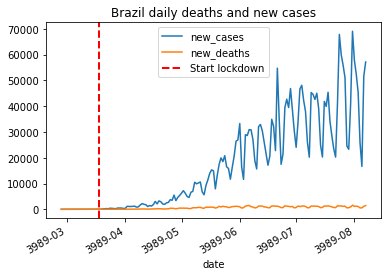

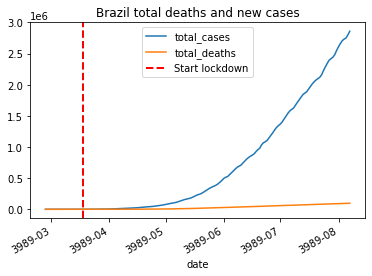

In [331]:
#Plotting the curves of the new cases and deaths and the total cases and deaths, showing vertically the start date of the alarm state. 
Br = Brazil[["new_cases", "new_deaths"]].plot()
Br.axvline(pd.to_datetime('2020-03-17'), color='r', linestyle='--', lw=2, label='Start lockdown')
plt.title("Brazil daily deaths and new cases")
plt.legend()

Br = Brazil[["total_cases", "total_deaths"]].plot()
Br.axvline(pd.to_datetime('2020-03-17'), color='r', linestyle='--', lw=2, label='Start lockdown')
plt.title("Brazil total deaths and new cases")
plt.legend()

Always taking into account the official data provided by the Brazilian government, on the first graph we can see that the new daily cases curve growing up very rapidly. This is the reason and why deaths curve looks so flat in comparison to "new cases" curve. Still, we must sign that the "new cases" line is falling down (very softly) at the end of our graph as a result of the partial isolation measures that the Brazilian government has been taking in different cities.

Something similar happens on the second graph, where the "total cases" curve overshadows the total deaths by proportional aspects.

In any case, we cannot underestimate the relevance of total deaths curve, which reachs the number of 95,819 people in total by 8th May 2020.

Sources: 
- https://www.worldometers.info/coronavirus/
- http://www.brazil.gov.br/

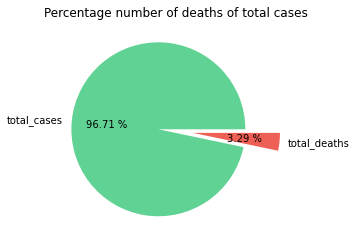

In [332]:
#percentage total deaths of the total cases.
cases = Brazil[["total_cases", "total_deaths"]].max().loc["total_cases"]
deaths = Brazil[["total_cases", "total_deaths"]].max().loc["total_deaths"]

mx_x = [cases, deaths]
mx_y = ["total_cases","total_deaths"]
desfase = (0.2,0.2)
colores =  ["#60D394","#EE6055"]
plt.pie(mx_x, labels=mx_y, autopct="%0.2f %%", colors=colores, explode=desfase)
plt.title("Percentage number of deaths of total cases")
plt.show()

Despite a drop in new cases in Brazil’s biggest cities, the number of new infections and deaths has plateaued at a high level as the virus spreads to the vast countryside and in smaller towns.

As a conclusion and having a look once again our graphs, we can see that the peak of new daily cases curve reached its maximum in late May. Even with government restrictions, the slightly improved curves are still in a critical phase. As graph number one shows us, flattening these curves will take very long and slow. Sources:

http://www.brazil.gov.br/ https://www.gov.br/acessoainformacao/pt-br
https://www.who.int/emergencies/diseases/novel-coronavirus-2019/technical-guidance